# Final Exam Second Semester 2567 - Principal Component Analysis (Country Problem)

This exam problem has an objective to develop a principal component analysis to reduce the dimension of the attributes of the countries in the world including
1. Exports
2. Imports
3. Income
4. Inflation
5. Health
6. Life Expectancy

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# library written for this exam
import utilsPCA as utils
import matplotlib.pyplot  as plt
%load_ext autoreload
%autoreload 2

import random 
random.seed(10)

### We start the exam by first loading the dataset.

In [2]:
# Load the dataset into the variable X 
data = np.loadtxt(r'D:\M.eng\Machine learning\final_crisis\data\PCA_CountryData.txt')
X = data

m = X.shape[0] # number of training examples

### Normalize data here
#### Hint: Use utils.featureNormalize

In [3]:
X.shape

(167, 6)

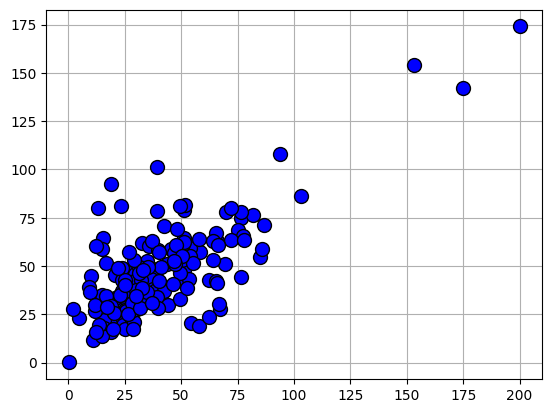

In [4]:
plt.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
plt.grid(True)
plt.show()


In [5]:
utils.featureNormalize

<function utilsPCA.featureNormalize(X)>

In [6]:
def pca(X):
    m, n = X.shape
    U = np.zeros((n,n))
    S = np.zeros(n)
    sigma = (1/m) * np.dot(X.T,X)
    U,S,V = np.linalg.svd(sigma)
    return U, S

[[-1.13486665 -0.08220771 -0.80582187  0.15686445  0.2782514  -1.61423717]
 [-0.47822017  0.07062429 -0.37424335 -0.31141089 -0.09672528  0.6459238 ]
 [-0.09882442 -0.639838   -0.22018227  0.78690764 -0.96317624  0.66841296]
 ...
 [ 1.12691568  1.37589222 -0.65642931  0.40850332  0.00885068  0.28609718]
 [-0.40525945 -0.51592016 -0.65694803  1.49641574 -0.59548067 -0.34359941]
 [-0.14989693 -0.66049097 -0.71919493  0.58824537 -0.3370016  -2.08650961]]


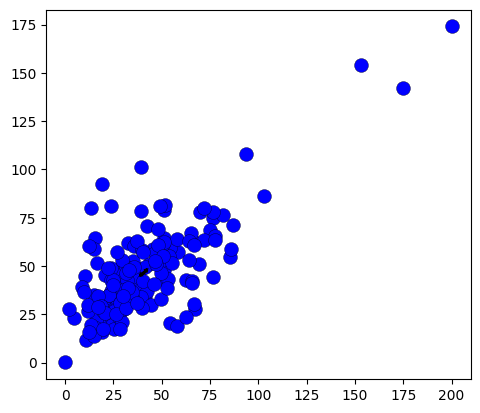

Top eigenvector: U[:, 0] = [-0.533153 -0.418933]


In [7]:
X_Norm, mu, sigma = utils.featureNormalize(X)
U, S = pca(X_Norm)
print(X_Norm)
# directions of maximum variations in the dataset.
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.set_aspect('equal')
ax.grid(False)
plt.show()

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))

In [8]:
X = X_Norm

In [9]:
pca(X)

(array([[-0.53315251,  0.44817763, -0.06452456, -0.08281789,  0.04795917,
         -0.70821107],
        [-0.41893251,  0.47061234,  0.43859283, -0.18642957, -0.19288202,
          0.58197633],
        [-0.49128553, -0.19336643, -0.44096693, -0.03838995,  0.64238906,
          0.33564657],
        [ 0.28238345,  0.28854731, -0.53659912, -0.71832617, -0.15668431,
          0.09229824],
        [-0.15503695, -0.54842174,  0.44740796, -0.6577362 ,  0.08270339,
         -0.18859082],
        [-0.44170761, -0.39527751, -0.34771911,  0.09111547, -0.71863963,
          0.05474082]]),
 array([2.32720933, 1.33522486, 1.11841827, 0.70793522, 0.36773308,
        0.1075511 ]))

In [10]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    Z = np.dot(X,U[:,:K])
    return Z

In [11]:
#  Project the data onto K = 4 dimension
K = 6 #reduce dimension
Z = projectData(X_Norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))

Projection of the first example: 1.749563


In [12]:
def recoverData(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    X_rec = np.dot(Z,U[:,:K].T)
    return X_rec

Approximation of the first example: [-1.134867 -0.082208]


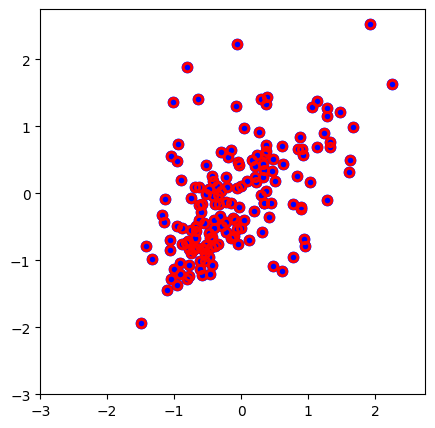

In [13]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_Norm[:, 0], X_Norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_Norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

plt.show()

In [14]:
#  Project the data onto K = 4 dimension
K = 4 #reduce dimension
Z = projectData(X_Norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))

Projection of the first example: 1.749563


In [15]:
print(Z)

[[ 1.74956262e+00  1.39244441e-01  9.94131526e-01 -3.02529160e-01]
 [ 5.09870639e-02 -4.00854495e-01  1.26088297e-01  3.86973871e-01]
 [ 5.05204306e-01  1.88247569e-01 -1.26276528e+00  2.65084234e-01]
 [ 1.07710579e+00  2.03721883e+00 -8.44141464e-01 -1.61804026e-01]
 [-7.78267329e-01 -8.14928595e-03  1.12319260e-01  5.73423681e-01]
 [ 9.44327936e-01 -1.11061811e+00 -1.20469718e+00 -8.43362022e-01]
 [ 6.88418531e-01  1.01812388e-01 -2.42262995e-01  7.01765977e-01]
 [-6.07290043e-01 -2.16853850e+00 -7.75028532e-01  3.25069407e-01]
 [-1.79260017e+00 -1.54304843e+00  3.99430952e-02 -5.20253037e-01]
 [ 5.11698943e-01  1.33831034e-01 -8.80329875e-01 -3.57147030e-02]
 [-4.12803398e-01 -8.01463413e-01  2.88048896e-01  3.63071975e-01]
 [-1.40742838e+00  4.19036094e-01 -1.03828572e+00  3.56605372e-01]
 [ 1.47386961e+00 -1.03358069e-01 -5.57224675e-01  1.12953352e+00]
 [-5.22648342e-01 -6.79843142e-01  4.05278549e-01  2.88144155e-01]
 [-2.09528342e-01  9.67454447e-01 -2.45375105e-01 -3.75009352e

In [16]:
def recoverData(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    X_rec = np.dot(Z,U[:,:K].T)
    return X_rec

Approximation of the first example: [-0.909469 -0.174999]


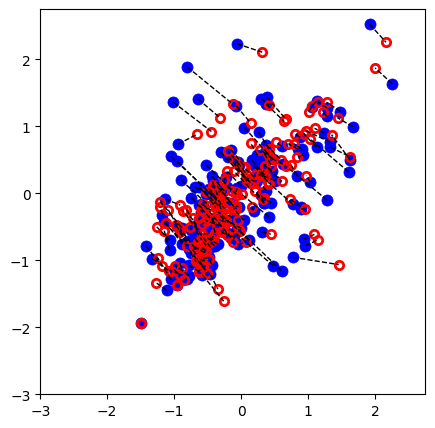

In [17]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_Norm[:, 0], X_Norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_Norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

plt.show()

In [18]:
print(X)

[[-1.13486665 -0.08220771 -0.80582187  0.15686445  0.2782514  -1.61423717]
 [-0.47822017  0.07062429 -0.37424335 -0.31141089 -0.09672528  0.6459238 ]
 [-0.09882442 -0.639838   -0.22018227  0.78690764 -0.96317624  0.66841296]
 ...
 [ 1.12691568  1.37589222 -0.65642931  0.40850332  0.00885068  0.28609718]
 [-0.40525945 -0.51592016 -0.65694803  1.49641574 -0.59548067 -0.34359941]
 [-0.14989693 -0.66049097 -0.71919493  0.58824537 -0.3370016  -2.08650961]]


In [19]:
print(S)

[2.32720933 1.33522486 1.11841827 0.70793522 0.36773308 0.1075511 ]


In [20]:
# standard deviation = 80%

In [21]:
m, n = X.shape
U = np.zeros((n,n))
S = np.zeros(n)
sigma = (1/m) * np.dot(X.T,X)
U,S,V = np.linalg.svd(sigma)
print(U, S)

[[-0.53315251  0.44817763 -0.06452456 -0.08281789  0.04795917 -0.70821107]
 [-0.41893251  0.47061234  0.43859283 -0.18642957 -0.19288202  0.58197633]
 [-0.49128553 -0.19336643 -0.44096693 -0.03838995  0.64238906  0.33564657]
 [ 0.28238345  0.28854731 -0.53659912 -0.71832617 -0.15668431  0.09229824]
 [-0.15503695 -0.54842174  0.44740796 -0.6577362   0.08270339 -0.18859082]
 [-0.44170761 -0.39527751 -0.34771911  0.09111547 -0.71863963  0.05474082]] [2.32720933 1.33522486 1.11841827 0.70793522 0.36773308 0.1075511 ]


In [22]:
print(sigma)

[[ 0.99401198  0.73296538  0.51368909 -0.10665191 -0.11372332  0.31441852]
 [ 0.73296538  0.99401198  0.12167328 -0.24551527  0.09514352  0.05406484]
 [ 0.51368909  0.12167328  0.99401198 -0.14687123  0.12880269  0.60829802]
 [-0.10665191 -0.24551527 -0.14687123  0.99401198 -0.2538466  -0.2382696 ]
 [-0.11372332  0.09514352  0.12880269 -0.2538466   0.99401198  0.20943049]
 [ 0.31441852  0.05406484  0.60829802 -0.2382696   0.20943049  0.99401198]]


In [34]:
S = np.linalg.svd(sigma)
for sigmas in sigma:
    if sigmas.any()>=0.8:
        print(sigmas.any())
        S = np.linalg.svd(sigmas.any())


True


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

### End of Principal Component Analysis Problem